Accuracy: 0.0

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           1       0.00      0.00      0.00       1.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



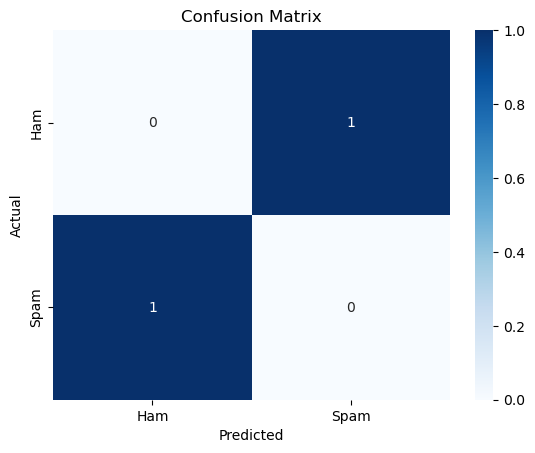

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


data = {
    "text": [
        "Win a $1000 gift card now!",
        "Hi, can we reschedule our meeting to tomorrow?",
        "Exclusive deal! Buy one, get one free for a limited time.",
        "Your order has been shipped. Thank you for shopping with us.",
        "Congratulations! You've been selected for a free trip to Paris.",
        "Please find attached the documents for review.",
        "Urgent! Claim your lottery prize before it expires!",
        "Friendly reminder about your upcoming doctor's appointment.",
        "Earn money quickly from home with no investment.",
        "Looking forward to seeing you at the conference next week."
    ],
    "label": ["spam", "ham", "spam", "ham", "spam", "ham", "spam", "ham", "spam", "ham"]
}


df = pd.DataFrame(data)


df['label'] = df['label'].map({'spam': 1, 'ham': 0})


vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['text'])


y = df['label']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = MultinomialNB()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Ham", "Spam"], yticklabels=["Ham", "Spam"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
